In [5]:
import pandas as pd
# Einlesen der Datei
combined_df = pd.read_csv('combined_dataset.csv')
# Datum als index nehmen
combined_df['Date'] = pd.to_datetime(combined_df['Date'])
combined_df.set_index('Date', inplace=True)
# ETFs und Aktien unterscheiden
combined_df['Source'] = combined_df['Source'].map({'Stock': 0, 'ETF': 1})
# Spalten auswählen die verwendet werden
features = ['Open', 'High', 'Low', 'Volume', 'Source']
# Das ziel ist es den Close-wert zu vorhersagen
target_field = 'Close'

X_combined = combined_df[features]
y_combined = combined_df[target_field]
# Zur überprüfung ob es funktioniert
print(combined_df.head())


              Open    High     Low   Close    Volume  OpenInt Ticker  Source
Date                                                                        
1999-11-18  30.713  33.754  27.002  29.702  66277506        0      a       0
1999-11-19  28.986  29.027  26.872  27.257  16142920        0      a       0
1999-11-22  27.886  29.702  27.044  29.702   6970266        0      a       0
1999-11-23  28.688  29.446  27.002  27.002   6332082        0      a       0
1999-11-24  27.083  28.309  27.002  27.717   5132147        0      a       0


In [4]:
import pandas as pd
import numpy as np
# Durchschnitts Volumen für jeden Ticker berechnen
avg_volume_per_ticker = combined_df.groupby('Ticker')['Volume'].mean()
print("Durchschnittliches Handelsvolumen pro Ticker:\n", avg_volume_per_ticker)
# Standartabweichung
std_close_per_ticker = combined_df.groupby('Ticker')['Close'].std()
print("\nStandardabweichung des Schlusskurses pro Ticker:\n", std_close_per_ticker)
# Durchschnittliche Preisspanne am Tag
combined_df['Daily Range'] = combined_df['High'] - combined_df['Low']
avg_daily_range_per_ticker = combined_df.groupby('Ticker')['Daily Range'].mean()
print("\nDurchschnittliche tägliche Preisspanne pro Ticker:\n", avg_daily_range_per_ticker)
# Totale veränderung berechnen
def calculate_total_change(series):
    if len(series) > 0:
        first_price = series.iloc[0]
        last_price = series.iloc[-1]
        return ((last_price - first_price) / first_price) * 100
    else:
        return np.nan

total_change_per_ticker = combined_df.groupby('Ticker')['Close'].apply(calculate_total_change)
print("\nProzentuale Veränderung des Schlusskurses über den Zeitraum pro Ticker:\n", total_change_per_ticker)
# Anzahl Handelstage
num_trading_days_per_ticker = combined_df.groupby('Ticker').size()
print("\nAnzahl der Handelstage pro Ticker:\n", num_trading_days_per_ticker)

Durchschnittliches Handelsvolumen pro Ticker:
 Ticker
a       3.993503e+06
aa      3.337757e+06
aaap    1.499889e+05
aaba    2.321796e+07
aac     2.204412e+05
            ...     
zumz    4.490524e+05
zvv     2.062060e+04
zx      3.659977e+04
zyme    2.708824e+04
zyne    3.639375e+05
Name: Volume, Length: 8506, dtype: float64

Standardabweichung des Schlusskurses pro Ticker:
 Ticker
a       12.944389
aa      23.627596
aaap    11.494574
aaba    17.235488
aac      9.928995
          ...    
zumz     8.809919
zvv      8.862585
zx       1.229839
zyme     1.935802
zyne     5.944354
Name: Close, Length: 8506, dtype: float64

Durchschnittliche tägliche Preisspanne pro Ticker:
 Ticker
a       0.817956
aa      0.694959
aaap    1.566031
aaba    0.936624
aac     1.131588
          ...   
zumz    1.004050
zvv     5.956000
zx      0.124059
zyme    0.423122
zyne    1.163641
Name: Daily Range, Length: 8506, dtype: float64

Prozentuale Veränderung des Schlusskurses über den Zeitraum pro Ticker:
 Ticke

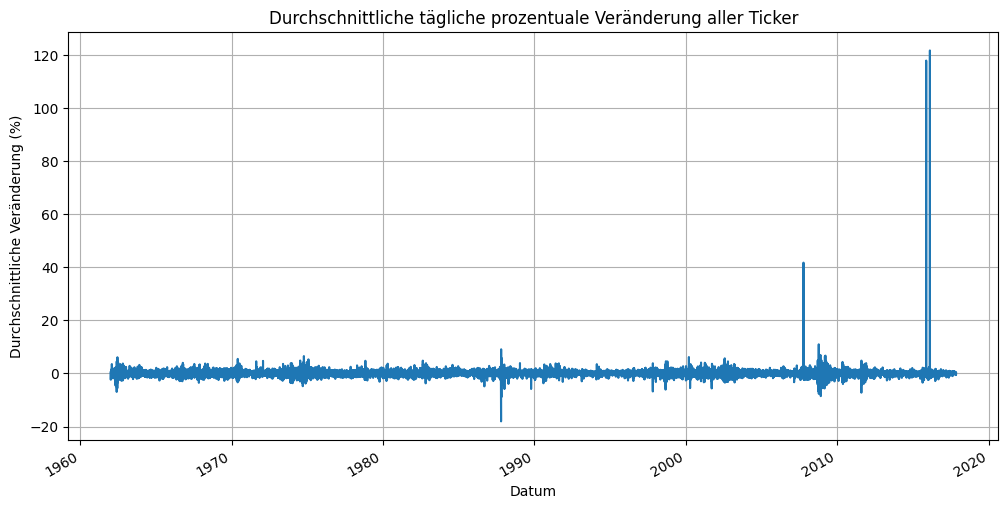

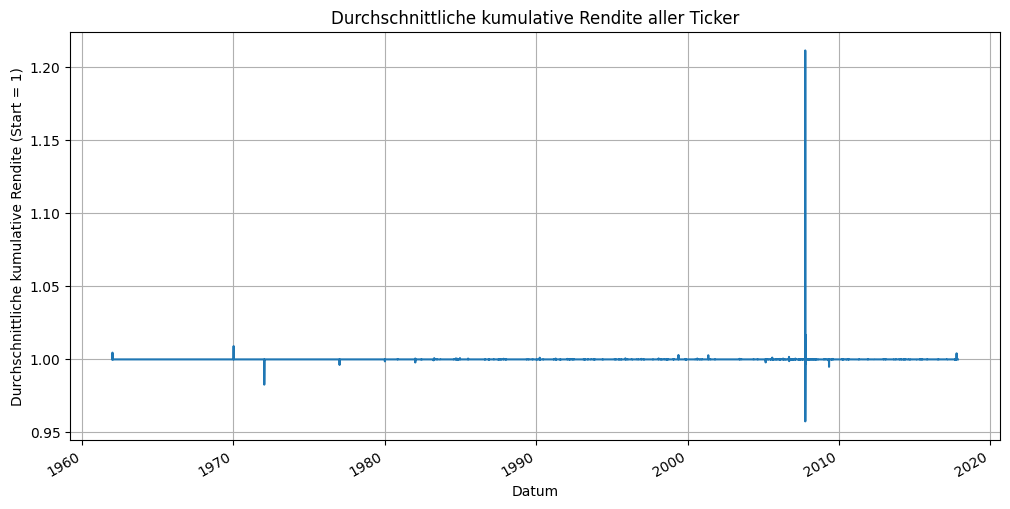

In [9]:
import matplotlib.pyplot as plt


# Durchschnittliche tägliche prozentuale Veränderung aller Ticker
combined_df['Daily Change (%)'] = combined_df.groupby('Ticker')['Close'].pct_change() * 100
average_daily_change = combined_df.groupby(combined_df.index)['Daily Change (%)'].mean()

plt.figure(figsize=(12, 6))
average_daily_change.plot(kind='line')
plt.title('Durchschnittliche tägliche prozentuale Veränderung aller Ticker')
plt.xlabel('Datum')
plt.ylabel('Durchschnittliche Veränderung (%)')
plt.grid(True)
plt.show()

# Durchschnittliche Rendite aller Ticker
combined_df['Daily Return'] = combined_df.groupby('Ticker')['Close'].pct_change()
cumulative_returns = (1 + combined_df.groupby('Ticker')['Daily Return'].cumprod()).fillna(1)
average_cumulative_return = cumulative_returns.groupby(combined_df.index).mean()

plt.figure(figsize=(12, 6))
average_cumulative_return.plot(kind='line')
plt.title('Durchschnittliche kumulative Rendite aller Ticker')
plt.xlabel('Datum')
plt.ylabel('Durchschnittliche kumulative Rendite (Start = 1)')
plt.grid(True)
plt.show()

              Volume  Scaled_Volume_Manual_MinMax
Date                                             
1999-11-18  66277506                     0.027345
1999-11-19  16142920                     0.006660
1999-11-22   6970266                     0.002876
1999-11-23   6332082                     0.002613
1999-11-24   5132147                     0.002117


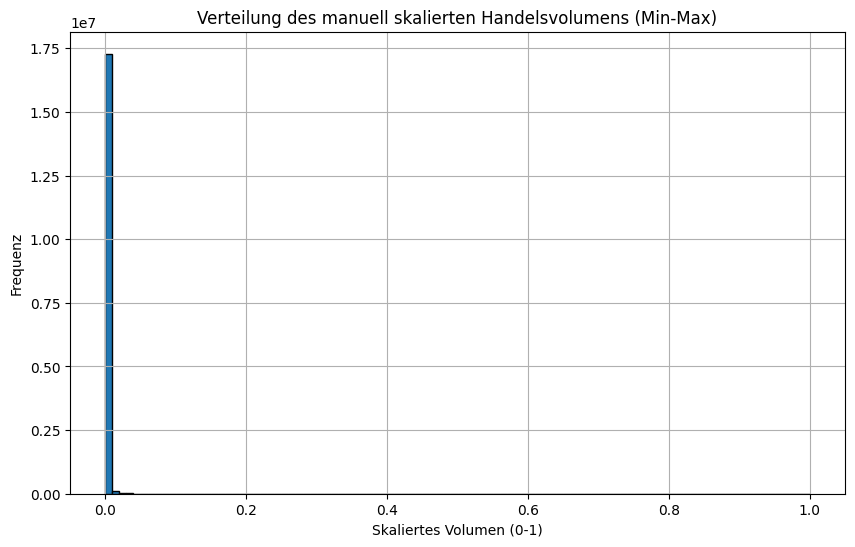

In [19]:

volume_data = combined_df['Volume']


min_val = volume_data.min()
max_val = volume_data.max(


scaled_volume = (volume_data - min_val) / (max_val - min_val)


combined_df['Scaled_Volume_Manual_MinMax'] = scaled_volume

print(combined_df[['Volume', 'Scaled_Volume_Manual_MinMax']].head())

plt.figure(figsize=(10, 6))
plt.hist(combined_df['Scaled_Volume_Manual_MinMax'], bins=100, edgecolor='black')  # Mehr Bins
plt.title('Verteilung des manuell skalierten Handelsvolumens (Min-Max)')
plt.xlabel('Skaliertes Volumen (0-1)')
plt.ylabel('Frequenz')
plt.grid(True)
plt.show()
